# 3. Exercise:

1. Download Haberman Cancer Survival dataset from Kaggle. You may have to create a Kaggle account to donwload data. (https://www.kaggle.com/gilsousa/habermans-survival-data-set)
2. Perform a similar alanlaysis as above on this dataset with the following sections:
* High level statistics of the dataset: number of points, numer of   features, number of classes, data-points per class.
* Explain our objective. 
* Perform Univaraite analysis(PDF, CDF, Boxplot, Voilin plots) to understand which features are useful towards classification.
* Perform Bi-variate analysis (scatter plots, pair-plots) to see if combinations of features are useful in classfication.
* Write your observations in english as crisply and unambigously as possible. Always quantify your results.

* The dataset contains cases from a study that was conducted between 1958 and 1970 at the University of Chicago's Billings Hospital on the survival of patients who had undergone surgery for breast cancer.

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


'''downlaod iris.csv from https://raw.githubusercontent.com/uiuc-cse/data-fa14/gh-pages/data/iris.csv'''
#Load Iris.csv into a pandas dataFrame.
haberman = pd.read_csv("haberman.csv")


In [3]:
haberman

,age,year,nodes,status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1
...,...,...,...,...
301,75,62,1,1
302,76,67,0,1
303,77,65,3,1
304,78,65,1,2


## Columns
1. Age- Age of the patients
2. year- year of treatment
3. Nodes- Number of positive auxillary nodes
4. Status - Survival Status of the patient 1 for survived, 2 for dead

In [4]:
# (Q) how many data-points and features?
print (haberman.shape)

(306, 4)


In [5]:
#(Q) What are the column names in our dataset?
print (haberman.columns)

Index(['age', 'year', 'nodes', 'status'], dtype='object')


In [6]:
#(Q) How many data points for each class are present? 
#(or) How many patients for each status are present?

print(haberman["status"].value_counts())

# balanced-dataset vs imbalanced datasets
#haberman is a imbalanced dataset as the number of data points for every class i.e status1-225 and status2-81.

1    225
2     81
Name: status, dtype: int64


In [7]:
haberman.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,306.0,52.457516,10.803452,30.0,44.0,52.0,60.75,83.0
year,306.0,62.852941,3.249405,58.0,60.0,63.0,65.75,69.0
nodes,306.0,4.026144,7.189654,0.0,0.0,1.0,4.00,52.0
status,306.0,1.264706,0.441899,1.0,1.0,1.0,2.00,2.0


# Objective 
###### To predict/classify whether the patient survived or not after 5 years of treatment based on the given independent variables such as age of patient,year of operation and the number of lymph nodes

# 1. Univariate Analysis 


## 1.1 Histogram

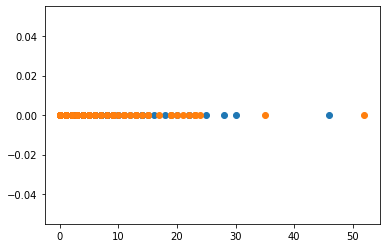

In [8]:
# What about 1-D scatter plot using just one feature?
#1-D scatter plot of nodes
import numpy as np
haberman_status1 = haberman.loc[haberman["status"] == 1];
haberman_status2 = haberman.loc[haberman["status"] == 2];
plt.plot(haberman_status1["nodes"], np.zeros_like(haberman_status1['nodes']), 'o')
plt.plot(haberman_status2["nodes"], np.zeros_like(haberman_status2['nodes']), 'o')
plt.show()
#Disadvantages of 1-D scatter plot: Very hard to make sense as points 
#are overlapping a lot.
#Are there better ways of visualizing 1-D scatter plots?

## 1.2 PDF (Probability Density Function) 

/home/ashish/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


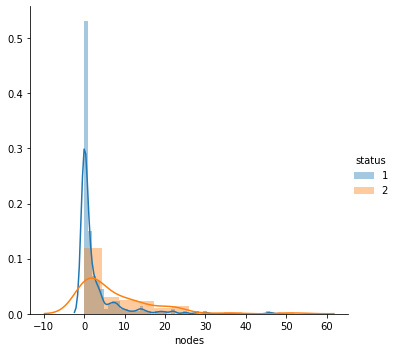

In [9]:
sns.FacetGrid(haberman, hue="status", size=5) \
   .map(sns.distplot, "nodes") \
   .add_legend();
plt.show();


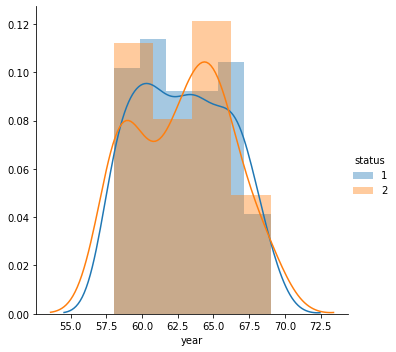

In [10]:
sns.FacetGrid(haberman, hue="status", size=5) \
   .map(sns.distplot, "year") \
   .add_legend();
plt.show();

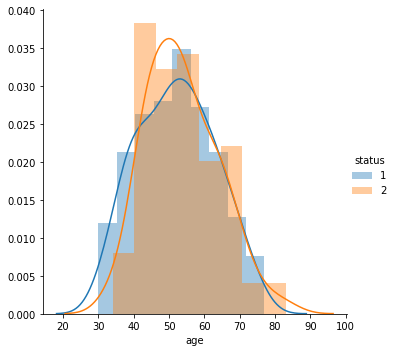

In [11]:
sns.FacetGrid(haberman, hue="status", size=5) \
   .map(sns.distplot, "age") \
   .add_legend();
plt.show();

### Observations
1. PDF has disadvantage i.e it is hard to figure out many points of all feature i.e age,years,nodes for each type of patient status since they are overlapping a lot.
2. For node feature,55% patients with node=0  had survived i.e status=1.
3. Accuracy of classification reduces when distribution overlap.

## 1.3  CDF (Cummulative Density Function)

PDF_10_Bins -  [0.77124183 0.09803922 0.05882353 0.02614379 0.02941176 0.00653595
 0.00326797 0.         0.00326797 0.00326797]
Bin_Edges_10 -  [ 0.   5.2 10.4 15.6 20.8 26.  31.2 36.4 41.6 46.8 52. ]
PDF_20_Bins -  [0.64379085 0.12745098 0.04575163 0.05228758 0.01960784 0.03921569
 0.00980392 0.01633987 0.02287582 0.00653595 0.00326797 0.00326797
 0.         0.00326797 0.         0.         0.         0.00326797
 0.         0.00326797]
Bin_Edges_20 -  [ 0.   2.6  5.2  7.8 10.4 13.  15.6 18.2 20.8 23.4 26.  28.6 31.2 33.8
 36.4 39.  41.6 44.2 46.8 49.4 52. ]


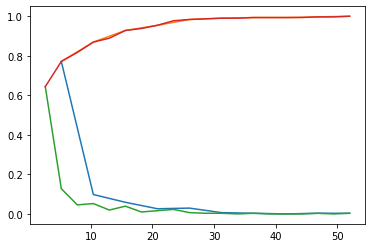

In [15]:
# Need for Cumulative Distribution Function (CDF)
# How to construct a CDF?
# How to read a CDF?

#Plot CDF of nodes

counts, bin_edges = np.histogram(haberman['nodes'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print("PDF_10_Bins - ",pdf);
print("Bin_Edges_10 - ",bin_edges);
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf);
plt.plot(bin_edges[1:], cdf)


counts, bin_edges = np.histogram(haberman['nodes'], bins=20,density = True)
                               
pdf = counts/(sum(counts))
print("PDF_20_Bins - ",pdf);
print("Bin_Edges_20 - ",bin_edges);                                
pdf = counts/(sum(counts))
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf);
plt.plot(bin_edges[1:], cdf)

plt.show();

                      age                       
PDF: [0.05333333 0.10666667 0.12444444 0.09333333 0.16444444 0.16444444
 0.09333333 0.11111111 0.06222222 0.02666667]
EDGES: [30.  34.7 39.4 44.1 48.8 53.5 58.2 62.9 67.6 72.3 77. ]
                      year                       
PDF: [0.18666667 0.10666667 0.10222222 0.07111111 0.09777778 0.10222222
 0.06666667 0.09777778 0.09333333 0.07555556]
EDGES: [58.  59.1 60.2 61.3 62.4 63.5 64.6 65.7 66.8 67.9 69. ]
                      nodes                       
PDF: [0.83555556 0.08       0.02222222 0.02666667 0.01777778 0.00444444
 0.00888889 0.         0.         0.00444444]
EDGES: [ 0.   4.6  9.2 13.8 18.4 23.  27.6 32.2 36.8 41.4 46. ]


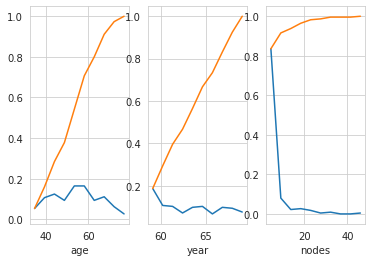

In [54]:
# Plots of CDF with PDF of survived patients 


l=list(haberman.columns[:3])
for i,c in enumerate(l):
    plt.subplot(1,3,i+1)
    counts, bin_edges = np.histogram(haberman_status1[c], bins=10,density = True)
    print("                     ",c,"                      ")
    pdf = counts/(sum(counts))
    print("PDF:",pdf);
    print("EDGES:",bin_edges)
    cdf = np.cumsum(pdf)
    plt.plot(bin_edges[1:],pdf)
    plt.plot(bin_edges[1:], cdf)
    plt.xlabel(c)



## Observations
1. Age below 60, Around 78% patients survived.
2. Surgery year between 60-70 could not give quanitative analysis of survivability.
3. 90% patients survived with nodes 0-17.It implies patient survivability increases as nodes decreases.


                             age                            
PDF: [0.03703704 0.12345679 0.19753086 0.19753086 0.13580247 0.12345679
 0.09876543 0.04938272 0.02469136 0.01234568]
EDGES: [34.  38.9 43.8 48.7 53.6 58.5 63.4 68.3 73.2 78.1 83. ]
                             year                            
PDF: [0.25925926 0.04938272 0.03703704 0.08641975 0.09876543 0.09876543
 0.16049383 0.07407407 0.04938272 0.08641975]
EDGES: [58.  59.1 60.2 61.3 62.4 63.5 64.6 65.7 66.8 67.9 69. ]
                             nodes                            
PDF: [0.56790123 0.14814815 0.13580247 0.04938272 0.07407407 0.
 0.01234568 0.         0.         0.01234568]
EDGES: [ 0.   5.2 10.4 15.6 20.8 26.  31.2 36.4 41.6 46.8 52. ]


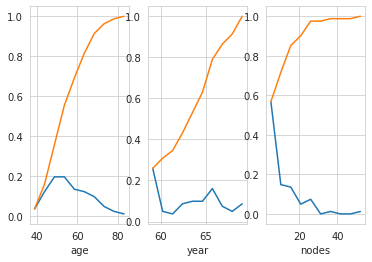

In [53]:
# Plots of CDF with PDF of Dead patients 

l=list(haberman.columns[:3])
for i,c in enumerate(l):
    plt.subplot(1,3,i+1)
    counts, bin_edges = np.histogram(haberman_status2[c], bins=10,density = True)
    print("                            ",c,"                           ")                            
    pdf = counts/(sum(counts))
    print("PDF:",pdf);
    print("EDGES:",bin_edges)
    cdf = np.cumsum(pdf)
    plt.plot(bin_edges[1:],pdf)
    plt.plot(bin_edges[1:], cdf)
    plt.xlabel(c)


# 1.5 Mean, Variance and Std-dev

In [20]:
#Mean, Variance, Std-deviation,  
print("Means:")
print(np.mean(haberman_status1["nodes"]))
#Mean with an outlier.
print(np.mean(np.append(haberman_status1["nodes"],50)));
print(np.mean(haberman_status2["nodes"]))

print("\nStd-dev:");
print(np.std(haberman_status1["nodes"]))
print(np.std(haberman_status2["nodes"]))




Means:
2.7911111111111113
3.0
7.45679012345679

Std-dev:
5.857258449412131
9.128776076761632


# 1.6 Median, Percentile, Quantile, IQR, MAD

In [21]:
#Median, Quantiles, Percentiles, IQR.
print("\nMedians:")
print(np.median(haberman_status1["nodes"]))
#Median with an outlier
print(np.median(np.append(haberman_status1["nodes"],50)));
print(np.median(haberman_status2["nodes"]))



print("\nQuantiles:")
print(np.percentile(haberman_status1["nodes"],np.arange(0, 100, 25)))
print(np.percentile(haberman_status2["nodes"],np.arange(0, 100, 25)))


print("\n90th Percentiles:")
print(np.percentile(haberman_status1["nodes"],90))
print(np.percentile(haberman_status2["nodes"],90))


from statsmodels import robust
print ("\nMedian Absolute Deviation")
print(robust.mad(haberman_status1["nodes"]))
print(robust.mad(haberman_status2["nodes"]))




Medians:
0.0
0.0
4.0

Quantiles:
[0. 0. 0. 3.]
[ 0.  1.  4. 11.]

90th Percentiles:
8.0
20.0

Median Absolute Deviation
0.0
5.930408874022408


## 1.7  Box plot and Whiskers


1. Whiskers in the plot below donot correposnd to the min and max values.

2. Box-plot can be visualized as a PDF on the side-ways.


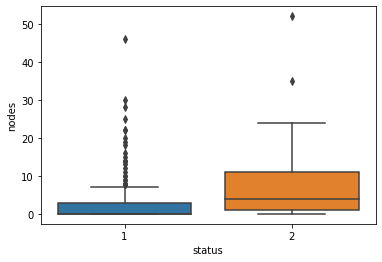

In [22]:
sns.boxplot(x='status',y='nodes', data=haberman)
plt.show()

## 1.8 Violin Plots

1. A violin plot combines the benefits of the previous two plots and simplifies them.

2.  Denser regions of the data are fatter, and sparser ones thinner in a violin plot.
 

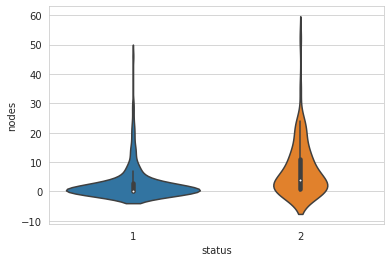

In [88]:

sns.violinplot(x="status", y="nodes", data=haberman, size=8)
plt.show()

## Observations
1. patients who had survived with cancer has max nodes=0 and few of them has has greater than 0.
2. Patients who were dead has  uniform distribution of nodes of cancer. 

# Bivariate Analysis
## 2.1 2-D Scatter Plot

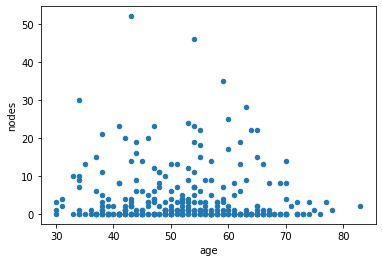

In [23]:
#2-D scatter plot:
#ALWAYS understand the axis: labels and scale.

haberman.plot(kind='scatter', x='age', y='nodes') ;
plt.show()

#can not  make much sense out it. 
#What if we color the points by thier class-label/patient-status-type.

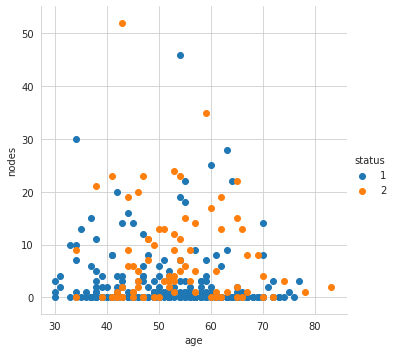

In [25]:
# 2-D Scatter plot with color-coding for each patient-status-type/class.
# Here 'sns' corresponds to seaborn. 
sns.set_style("whitegrid");
sns.FacetGrid(haberman,hue="status", size=5) \
   .map(plt.scatter, "age", "nodes") \
   .add_legend();
plt.show();




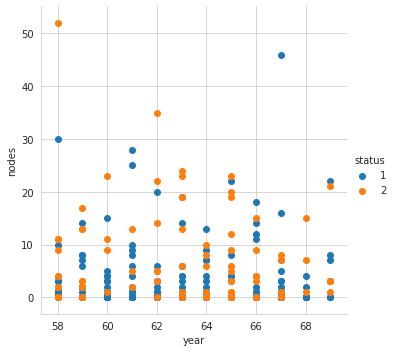

In [26]:
 
sns.set_style("whitegrid");
sns.FacetGrid(haberman,hue="status", size=5) \
   .map(plt.scatter, "year", "nodes") \
   .add_legend();
plt.show();



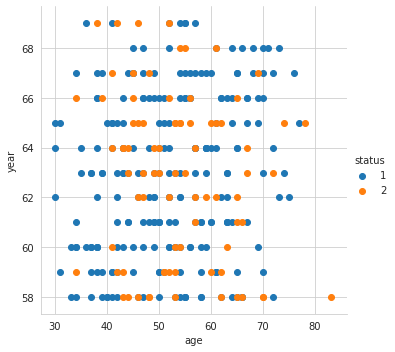

In [27]:

sns.set_style("whitegrid");
sns.FacetGrid(haberman,hue="status", size=5) \
   .map(plt.scatter, "age", "year") \
   .add_legend();
plt.show();


#### Observation(s):
1. Notice that the blue points can not be easily seperated from orange by drawing a line. 
2.  we can't draw multiple 2-D scatter plots for each combination of features?
3. Total cobinations exist 3C2 = 3.
4. Has disadvantage with 4-D, 5-D or n-D scatter plot.


##   2.2 Pair-plot

/home/ashish/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)
/home/ashish/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/home/ashish/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


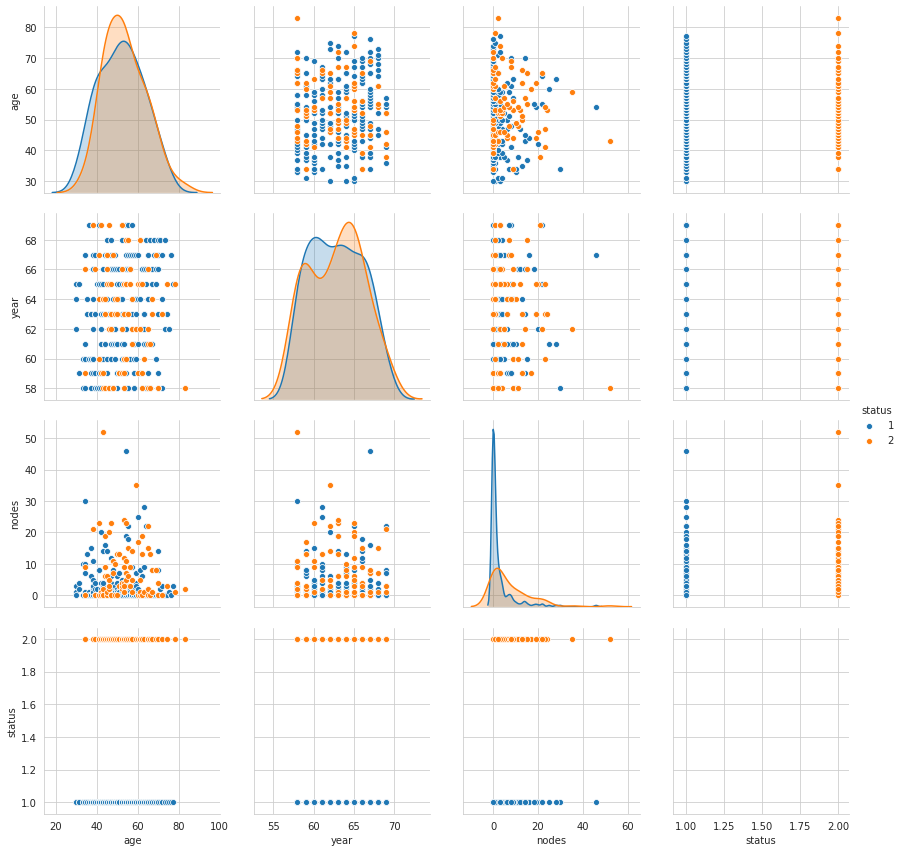

In [28]:
# pairwise scatter plot: Pair-Plot
# Dis-advantages: 
##Can be used when number of features are high.
##Cannot visualize higher dimensional patterns in 3-D and 4-D. 
#Only possible to view 2D patterns.

plt.close();
sns.set_style("whitegrid");
sns.pairplot(haberman, hue='status', size=3);
plt.show()
# NOTE: the diagnol elements are PDFs for each feature. PDFs are explained below.

#### Observation
* There is overlap in pair plots so it is difficult to figure out classification.

# Multivariate Analysis

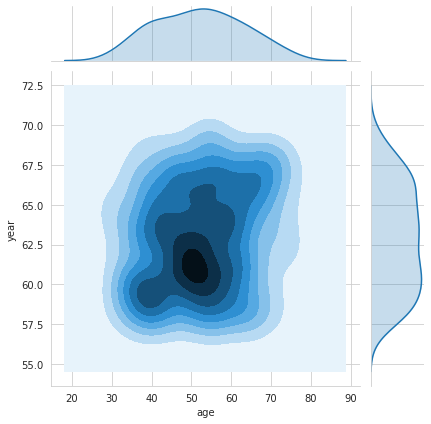

In [34]:
#2D Density plot, contors-plot
sns.jointplot(x="age", y="year", data=haberman_status1, kind="kde");
plt.show();


In [29]:
haberman_status1_SW = haberman_status1.iloc[:,1]
haberman_status2_SW = haberman_status2.iloc[:,1]


In [30]:
from scipy import stats
stats.ks_2samp(haberman_status1_SW, haberman_status2_SW)

Ks_2sampResult(statistic=0.0725925925925926, pvalue=0.885895386162465)

In [31]:
x = stats.norm.rvs(loc=0.2, size=10)
stats.kstest(x,'norm')


KstestResult(statistic=0.18256241950127128, pvalue=0.8928225727098417)

In [32]:
x = stats.norm.rvs(loc=0.2, size=100)
stats.kstest(x,'norm')


KstestResult(statistic=0.1324460207057241, pvalue=0.054483491901153376)

In [33]:
x = stats.norm.rvs(loc=0.2, size=1000)
stats.kstest(x,'norm')


KstestResult(statistic=0.1000887362038465, pvalue=3.5737220177371265e-09)